# Трехмерный анализ параметров цикла установки

## Импорт библиотек

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Импорт данных

In [2]:
data = pd.read_json('/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/build/data/3n.json')
data.pi_high = data.pi_high.round(3)
data.pi_low = data.pi_low.round(3)

### Выберем интересующее подмножество данных, а также выберем интересующие нас точки

In [116]:
eff_data = data[['pi_high', 'pi_low', 'efficiency', 'specific_power']].sort_values(['pi_high', 'pi_low'])
eff_data.specific_power /= 1e6

eta_max_point = eff_data[eff_data.efficiency == eff_data.efficiency.max()]
labour_max_point = eff_data[eff_data.specific_power == eff_data.specific_power.max()]
selected_point = eff_data.iloc[((eff_data.pi_high-4)**2 + (eff_data.pi_low-4.8)**2).argsort()[:1]]

In [117]:
eta_max_point

,pi_high,pi_low,efficiency,specific_power
901,5.231,5.385,0.392863,0.271019


In [118]:
labour_max_point

,pi_high,pi_low,efficiency,specific_power
487,3.077,3.846,0.348582,0.330925


In [119]:
selected_point

,pi_high,pi_low,efficiency,specific_power
733,4.0,4.769,0.38267,0.312719


In [126]:
def plot_colormap(z_arr, extreme_point, need_transpose=False):
    fig, ax = plt.subplots(figsize=(12, 10))
    side = round(len(eff_data)**0.5)
    
    X = eff_data.pi_low.as_matrix().reshape((side,side))
    Y = eff_data.pi_high.as_matrix().reshape((side,side))
    Z = z_arr.as_matrix().reshape((side, side))[::-1]
    
    im = plt.imshow(
        Z, cmap=plt.cm.plasma, 
        vmin=Z.min(), vmax=Z.max(), extent=[X.min(), X.max(), Y.min(), Y.max()]
    )
    im.set_interpolation('bilinear')
    
    cb = fig.colorbar(im)
    cb.ax.tick_params(labelsize=15)
    
    print(extreme_point)
    ax.scatter([
        extreme_point.pi_low.as_matrix()[0],
        selected_point.pi_low.as_matrix()[0]
    ], [
        extreme_point.pi_high.as_matrix()[0],
        selected_point.pi_high.as_matrix()[0]
    ], color=['blue', 'green'], s=100)
    
    plt.xlabel('$\pi_{КНД}$', fontsize=25, position=(1, 0))
    ylabel = ax.set_ylabel('$\pi_{КВД}$', fontsize = 25)
    ax.yaxis.set_label_coords(-0.08, 0.9)
    ylabel.set_rotation(0)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

### Построим график КПД в зависимости от двух степеней повышения давления

     pi_high  pi_low  efficiency  specific_power
901    5.231   5.385    0.392863        0.271019


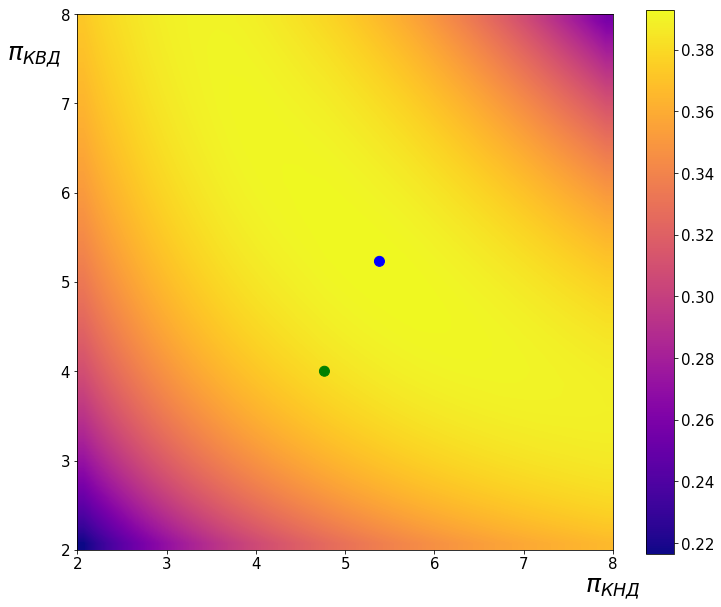

In [127]:
plot_colormap(eff_data.efficiency, eta_max_point, False)

### Построим график удельной работы в зависимости от степеней повышения давления

     pi_high  pi_low  efficiency  specific_power
487    3.077   3.846    0.348582        0.330925


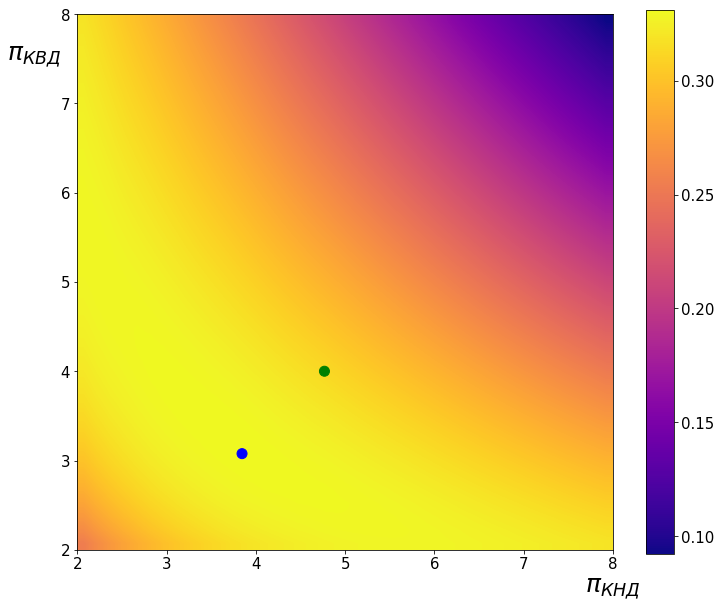

In [128]:
plot_colormap(eff_data.specific_power, labour_max_point)

In [108]:
eff_data

,index,pi_high,pi_low,efficiency,specific_power
0,0,2.0,2.000,0.216556,0.254866
1,40,2.0,2.154,0.227557,0.264898
2,80,2.0,2.308,0.237487,0.273536
3,120,2.0,2.462,0.246516,0.281026
4,160,2.0,2.615,0.254855,0.287685
5,200,2.0,2.769,0.262508,0.293489
6,240,2.0,2.923,0.269586,0.298608
7,280,2.0,3.077,0.276117,0.303059
8,320,2.0,3.231,0.282179,0.306960
9,360,2.0,3.385,0.287862,0.310439
